# Principal Components Analysis and Clustering

The part adapts some of the examples from the textbook from R into Python, and is based on the adaptations from the following two sites:
* https://github.com/JWarmenhoven/ISLR-python
* https://github.com/jcrouser/islr-python

In [103]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

## Principal Components Analysis

In this lab, we perform PCA on the ${\tt USArrests}$ data set. The rows of the data set contain the 50 states, in
alphabetical order:

In [104]:
df = pd.read_csv('USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


The columns of the data set contain four variables relating to various crimes:

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Let's start by taking a quick look at the column means of the data:

In [106]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

We see right away the the data have **vastly** different means. We can also examine the variances of the four variables:

In [107]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Not surprisingly, the variables also have vastly different variances: the
${\tt UrbanPop}$ variable measures the percentage of the population in each state
living in an urban area, which is not a comparable number to the number
of crimes committeed in each state per 100,000 individuals. If we failed to scale the
variables before performing PCA, then most of the principal components
that we observed would be driven by the ${\tt Assault}$ variable, since it has by
far the largest mean and variance. 

Thus, it is important to standardize the
variables to have mean zero and standard deviation 1 before performing
PCA. We can do this using the ${\tt scale()}$ function from ${\tt sklearn}$:

In [108]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

### Getting the Principal Component Loadings (for each feature)

Now we'll use the ${\tt PCA()}$ function from ${\tt sklearn}$ to compute the loading vectors:

In [109]:
from sklearn.decomposition import PCA

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


We see that there are four distinct principal components. This is to be
expected because there are in general ${\tt min(n − 1, p)}$ informative principal
components in a data set with $n$ observations and $p$ variables.

### Getting the Principal Component Scores (for each observation)

Using the fit_transform() function, we can get the principal component scores of the original data. We'll take a look at the first few states:

In [110]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


### Creating a Bi-Plot

We can construct a **biplot** of the first two principal components using our loading vectors:

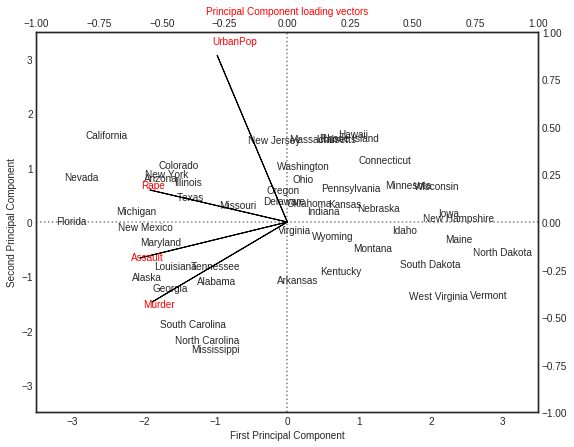

In [112]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

### Creating Scree Plots

The ${\tt PCA()}$ function also outputs the variance explained by of each principal
component. We can access these values as follows:

In [11]:
pca.explained_variance_

array([ 2.53085875,  1.00996444,  0.36383998,  0.17696948])

We can also get the proportion of variance explained:

In [12]:
pca.explained_variance_ratio_

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

We see that the first principal component explains 62.0% of the variance
in the data, the next principal component explains 24.7% of the variance,
and so forth. We can plot the PVE explained by each component as follows:

([<matplotlib.axis.XTick at 0x7f60e152ab70>,
 <a list of 4 Text xticklabel objects>)

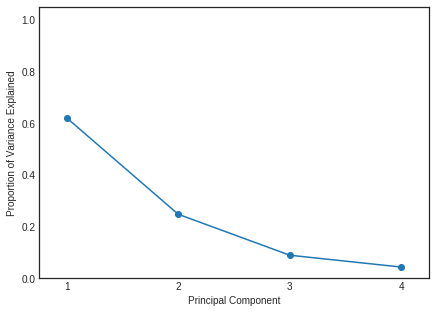

In [13]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

We can also use the function ${\tt cumsum()}$, which computes the cumulative sum of the elements of a numeric vector, to plot the cumulative PVE:

([<matplotlib.axis.XTick at 0x7f60e0485a58>,
 <a list of 4 Text xticklabel objects>)

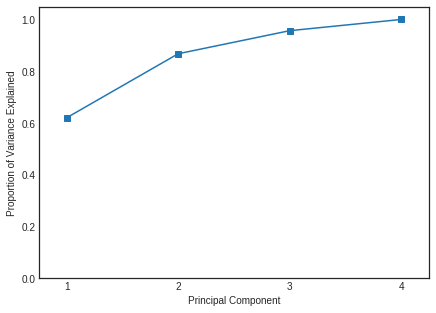

In [14]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])



# Clustering

In [15]:
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

### K-Means Clustering

Here we random generate some values by sampling from a Normal distribution. There are 50 observations, with 2 features each. 

We then shift some of the observations around. For the first 25 observations, we increase their first feature values by 3. For the last 25 observations, we decrease their second feature values by 4. 

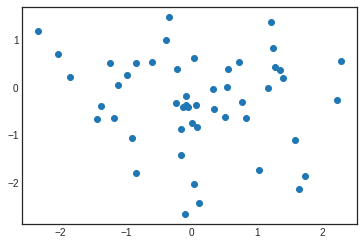

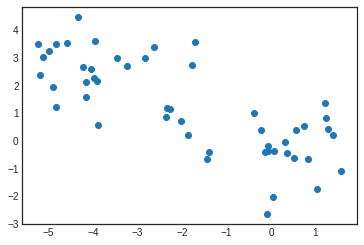

In [16]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
plt.figure()
plt.scatter(X[:,1], X[:,0])
plt.show()


X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

plt.figure()
plt.scatter(X[:,1], X[:,0])
plt.show()

#### First we will try K-means with K = 2

In [17]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int32)

#### Now we will try K = 3

In [19]:

np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
pd.Series(km2.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [21]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [22]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2], dtype=int32)

In [23]:
# Sum of distances of samples to their closest cluster center.

km2.inertia_

68.973792009397258

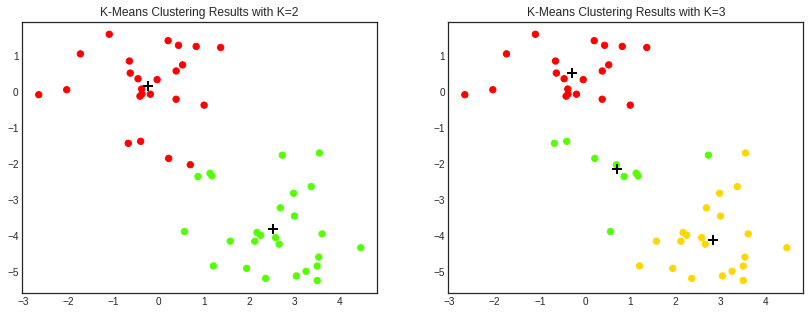

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### Hierarchical Clustering

For hierarchical clustering, we will use scipy instead of sklearn.

We will try three types of linkages. 

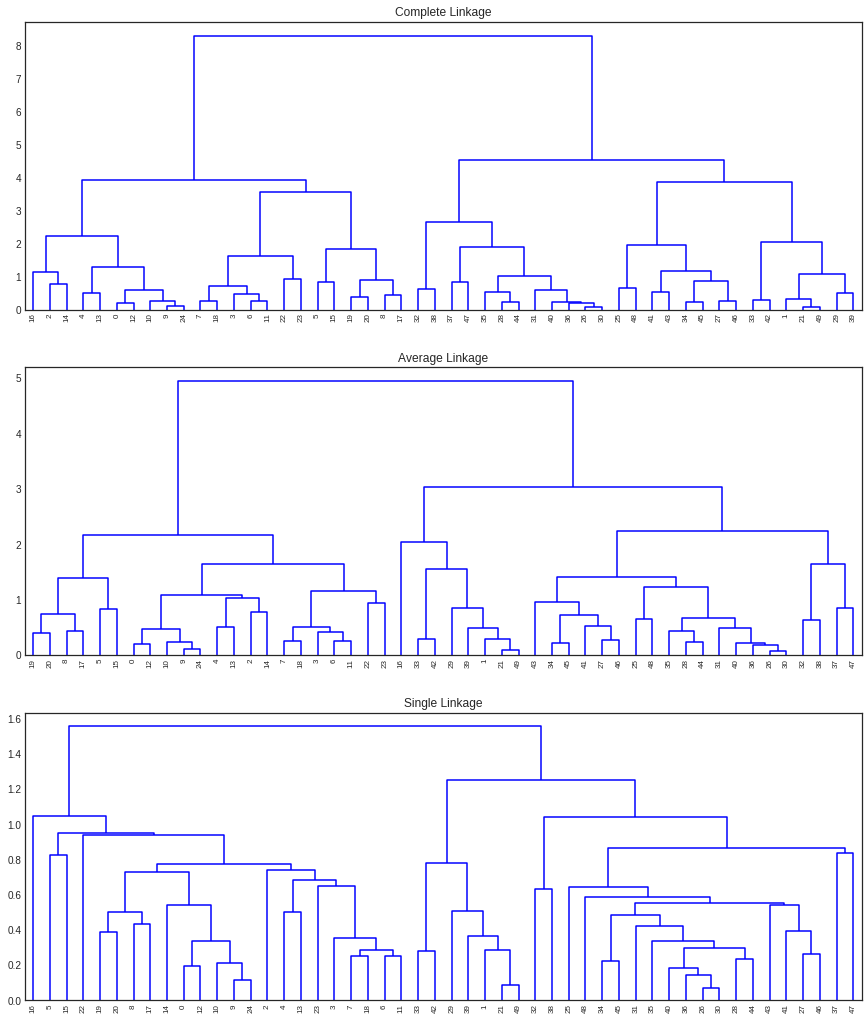

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

We can get cluster assignments by cutting the tree. A strength of hierarchical clustering is that we can choose different numbers of clusters from the tree. Here we show cluster assignments with two clusters and with three clusters. 